In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [38]:
Data_app = pd.read_csv('C:/Users/admin/Desktop/ML/Data/Card_application.csv')
Data_credit = pd.read_csv('C:/Users/admin/Desktop/ML/Data/Card_credit.csv')

In [39]:
Data_app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [40]:
Data_credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [41]:
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [42]:
print(f"Total records: {len(Data_app):,}")
print(f"Total features: {Data_app.shape[1]}")
print(f"Memory usage: {Data_app.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

Total records: 438,557
Total features: 18
Memory usage: 251.2 MB


In [43]:
missing_counts = Data_app.isnull().sum()
missing_percentages = (missing_counts / len(Data_app)) * 100

In [44]:
missing_summary = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percentage': missing_percentages
}).sort_values('Missing_Count', ascending=False)

print(missing_summary)

                     Missing_Count  Missing_Percentage
OCCUPATION_TYPE             134203           30.601039
ID                               0            0.000000
CODE_GENDER                      0            0.000000
FLAG_EMAIL                       0            0.000000
FLAG_PHONE                       0            0.000000
FLAG_WORK_PHONE                  0            0.000000
FLAG_MOBIL                       0            0.000000
DAYS_EMPLOYED                    0            0.000000
DAYS_BIRTH                       0            0.000000
NAME_HOUSING_TYPE                0            0.000000
NAME_FAMILY_STATUS               0            0.000000
NAME_EDUCATION_TYPE              0            0.000000
NAME_INCOME_TYPE                 0            0.000000
AMT_INCOME_TOTAL                 0            0.000000
CNT_CHILDREN                     0            0.000000
FLAG_OWN_REALTY                  0            0.000000
FLAG_OWN_CAR                     0            0.000000
CNT_FAM_ME

In [45]:
total_duplicates = Data_app.duplicated().sum()
print(f"Total duplicate rows: {total_duplicates:,}")
print(f"Duplicate percentage: {total_duplicates/len(Data_app)*100:.2f}%")

Total duplicate rows: 0
Duplicate percentage: 0.00%


In [46]:
Data_app.drop_duplicates(subset=['ID'], inplace=True)
Data_app.drop(['FLAG_MOBIL'], axis=1, inplace=True)
Data_app['OCCUPATION_TYPE'].fillna(value='Not identified', inplace=True)

In [47]:
if 'ID' in Data_app.columns:
    unique_ids = Data_app['ID'].nunique()
    total_records = len(Data_app)
    print(f"\nUnique IDs: {unique_ids:,}")
    print(f"Total records: {total_records:,}")
    print(f"Records per ID (average): {total_records/unique_ids:.1f}")


Unique IDs: 438,510
Total records: 438,510
Records per ID (average): 1.0


In [48]:
for col in Data_app.columns:    
    # Basics 
    print(f"Data type: {Data_app[col].dtype}")
    print(f"Unique values: {Data_app[col].nunique():,}")
    print(f"Null values: {Data_app[col].isnull().sum():,}")
    
    if Data_app[col].dtype in ['int64', 'float64']:
        # Numerical column analysis
        stats = Data_app[col].describe()
        for stat_name, stat_value in stats.items():
            print(f"{stat_name:>10}: {stat_value:>10.2f}")
        
        # Check for outliers using IQR method
        Q1 = Data_app[col].quantile(0.25)
        Q3 = Data_app[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = Data_app[(Data_app[col] < lower_bound) | (Data_app[col] > upper_bound)]
        print(f"Outliers (IQR method): {len(outliers):,} ({len(outliers)/len(Data_app)*100:.2f}%)")
        
    else:
        # Categorical column analysis
        value_counts = Data_app[col].value_counts().head(10)
        print(value_counts)
        
        if Data_app[col].nunique() <= 20:
            print(f"\nAll unique values:")
            all_values = Data_app[col].value_counts()
            print(all_values)

Data type: int64
Unique values: 438,510
Null values: 0
     count:  438510.00
      mean: 6022034.96
       std:  571496.24
       min: 5008804.00
       25%: 5609362.25
       50%: 6047719.50
       75%: 6454160.75
       max: 7999952.00
Outliers (IQR method): 3,346 (0.76%)
Data type: object
Unique values: 2
Null values: 0
F    294406
M    144104
Name: CODE_GENDER, dtype: int64

All unique values:
F    294406
M    144104
Name: CODE_GENDER, dtype: int64
Data type: object
Unique values: 2
Null values: 0
N    275427
Y    163083
Name: FLAG_OWN_CAR, dtype: int64

All unique values:
N    275427
Y    163083
Name: FLAG_OWN_CAR, dtype: int64
Data type: object
Unique values: 2
Null values: 0
Y    304040
N    134470
Name: FLAG_OWN_REALTY, dtype: int64

All unique values:
Y    304040
N    134470
Name: FLAG_OWN_REALTY, dtype: int64
Data type: int64
Unique values: 12
Null values: 0
     count:  438510.00
      mean:       0.43
       std:       0.72
       min:       0.00
       25%:       0.00
   

<Axes: >

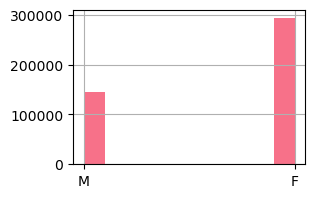

In [53]:
Data_app['CODE_GENDER'].hist(figsize=(3,2))

<Axes: >

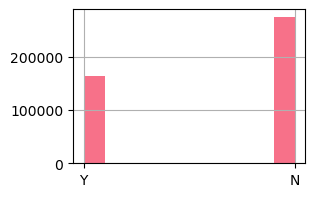

In [57]:

Data_app['FLAG_OWN_CAR'].hist(figsize=(3,2))

<Axes: >

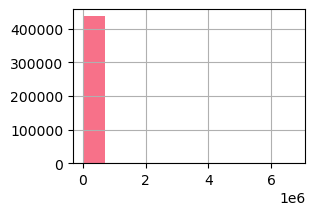

In [59]:
Data_app['AMT_INCOME_TOTAL'].hist(figsize=(3,2))

<Axes: >

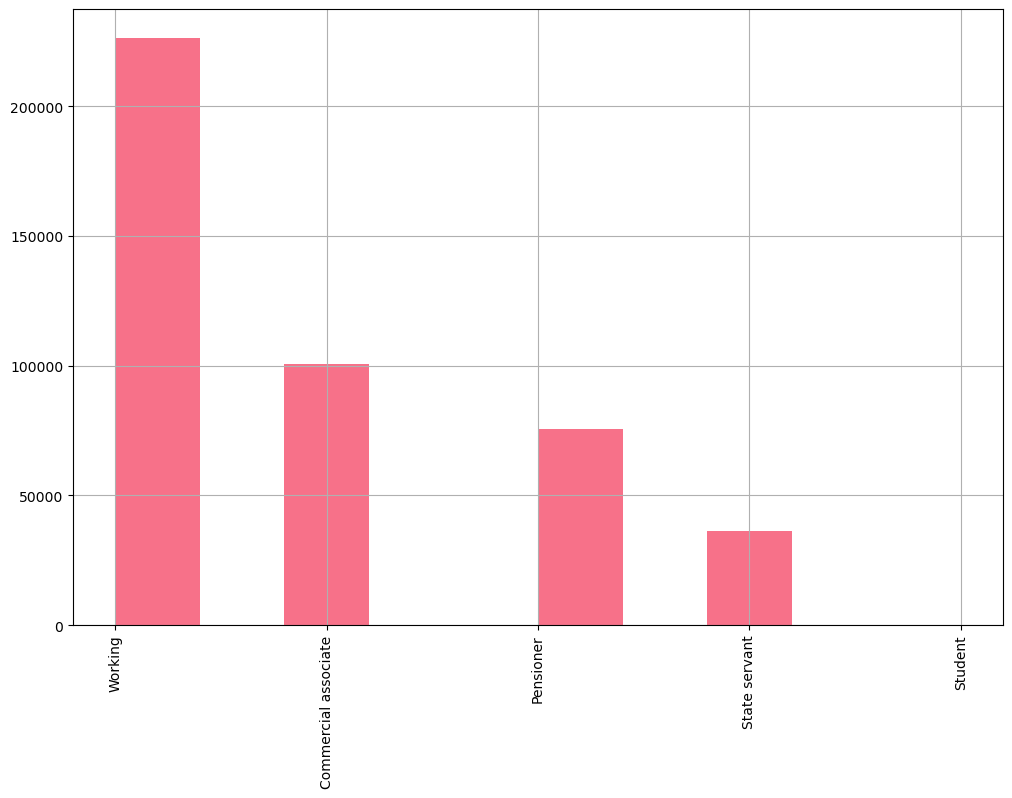

In [65]:

Data_app['NAME_INCOME_TYPE'].hist(xrot=90)


array([[<Axes: title={'center': 'Accountants'}>,
        <Axes: title={'center': 'Cleaning staff'}>,
        <Axes: title={'center': 'Cooking staff'}>,
        <Axes: title={'center': 'Core staff'}>],
       [<Axes: title={'center': 'Drivers'}>,
        <Axes: title={'center': 'HR staff'}>,
        <Axes: title={'center': 'High skill tech staff'}>,
        <Axes: title={'center': 'IT staff'}>],
       [<Axes: title={'center': 'Laborers'}>,
        <Axes: title={'center': 'Low-skill Laborers'}>,
        <Axes: title={'center': 'Managers'}>,
        <Axes: title={'center': 'Medicine staff'}>],
       [<Axes: title={'center': 'Not identified'}>,
        <Axes: title={'center': 'Private service staff'}>,
        <Axes: title={'center': 'Realty agents'}>,
        <Axes: title={'center': 'Sales staff'}>],
       [<Axes: title={'center': 'Secretaries'}>,
        <Axes: title={'center': 'Security staff'}>,
        <Axes: title={'center': 'Waiters/barmen staff'}>, <Axes: >]],
      dtype=object

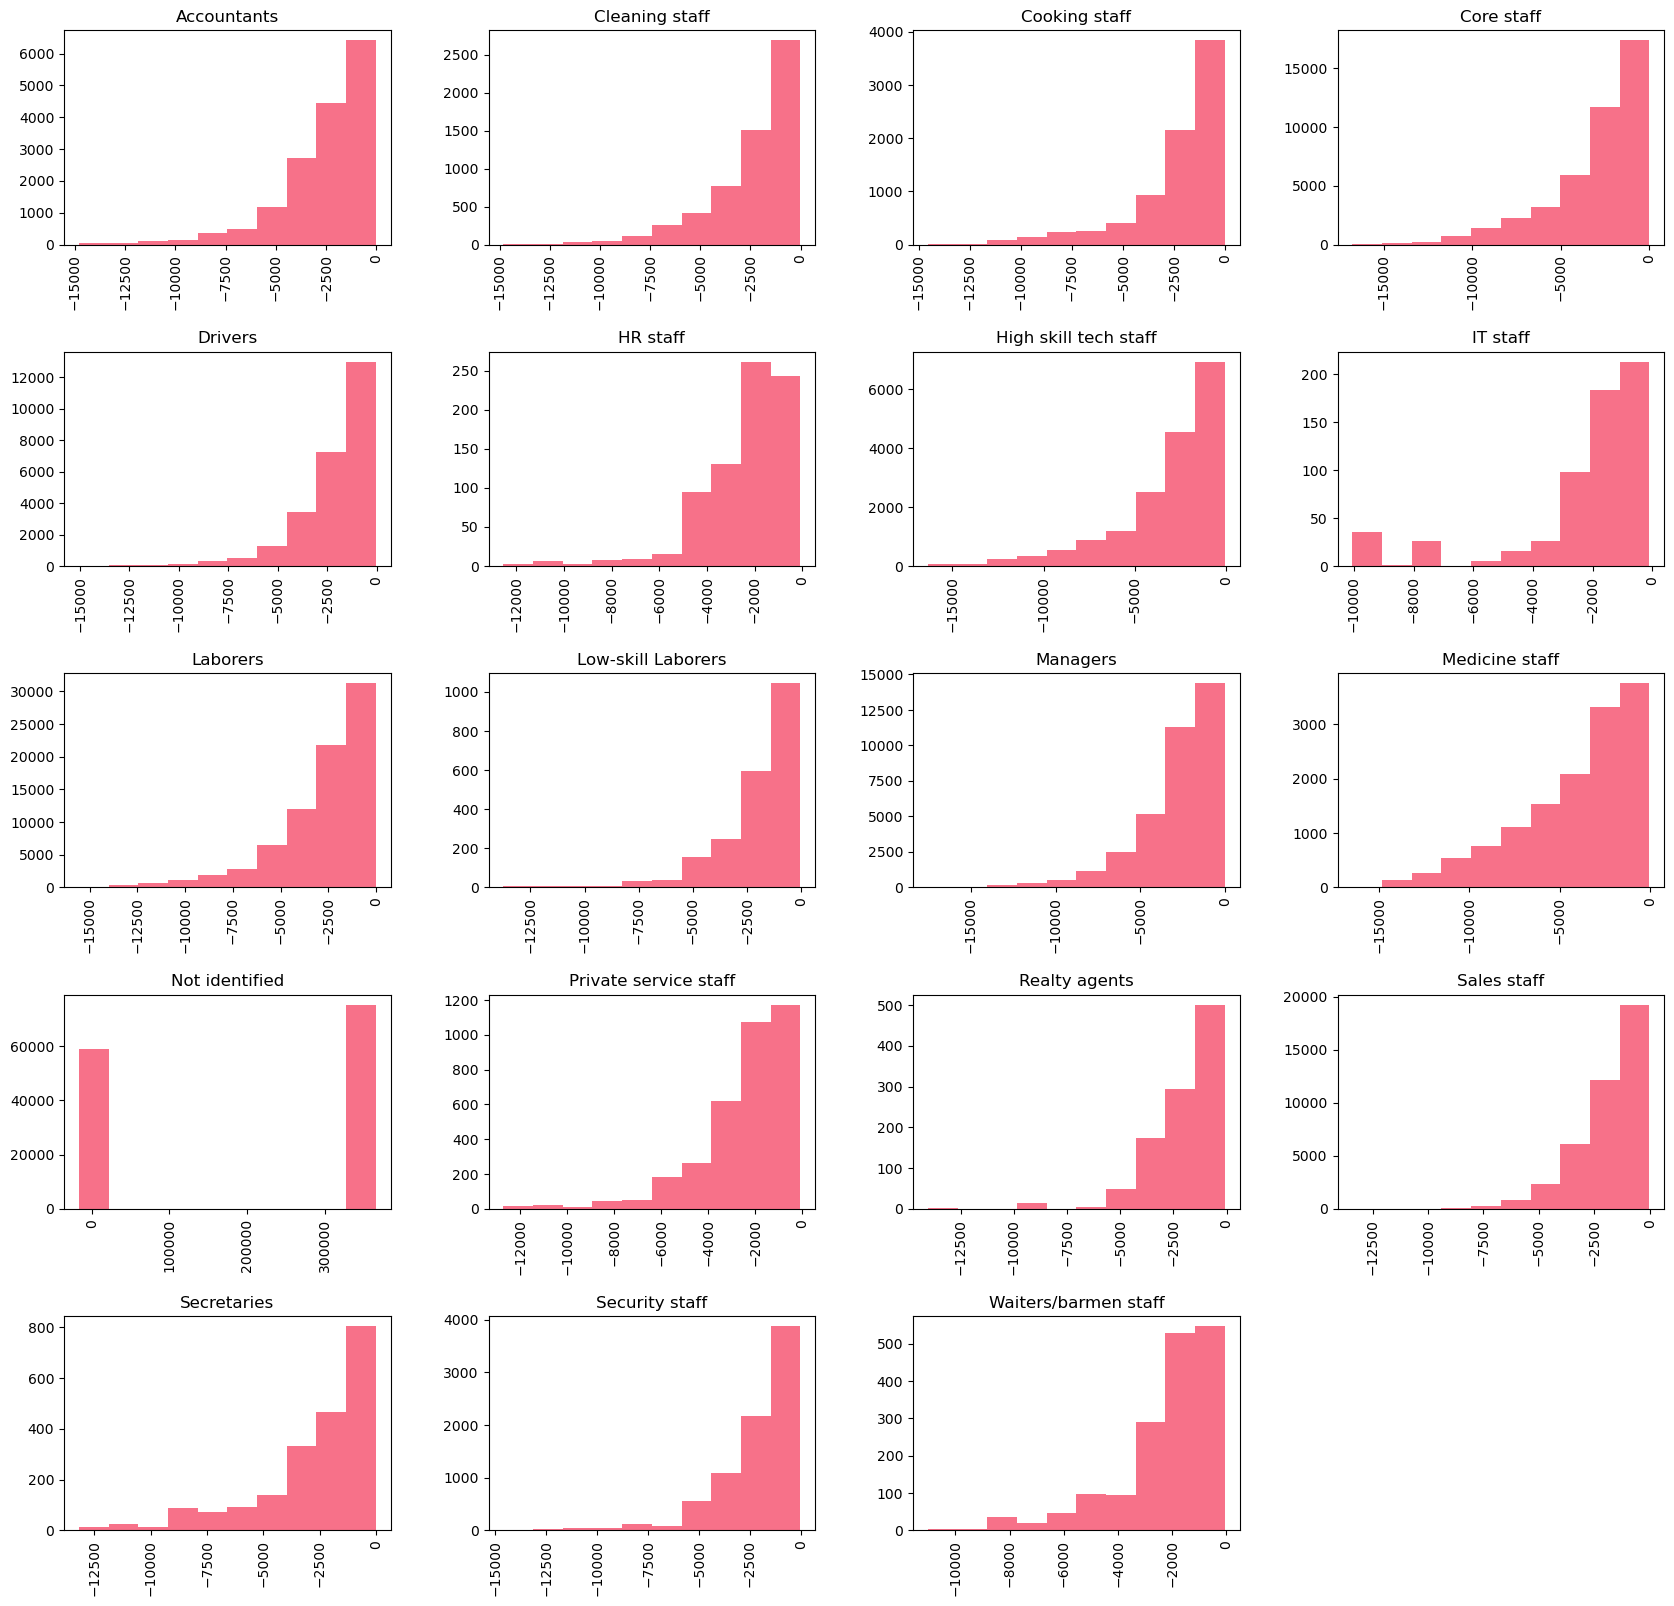

In [66]:
Data_app[['DAYS_EMPLOYED','OCCUPATION_TYPE']].hist(by='OCCUPATION_TYPE', figsize=(20, 20))